In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from csv file
pid= pd.read_csv('diabetes.csv')
pid.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# checking shape
pid.shape

(768, 9)

In [4]:
# checking data type
pid.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# checking the data description
pid.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# checking null value
pid.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# corelation between coloums
pid.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


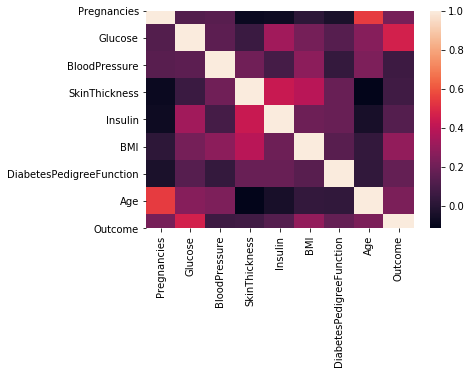

In [8]:
# heat map of corelation
corr_hmap=pid.corr()
sns.heatmap(corr_hmap)

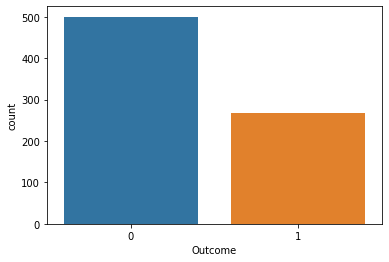

In [9]:
sns.countplot(x=pid['Outcome'],data=pid)

Pregnancies                    AxesSubplot(0.125,0.536818;0.133621x0.343182)
Glucose                     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
BloodPressure                AxesSubplot(0.44569,0.536818;0.133621x0.343182)
SkinThickness               AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Insulin                     AxesSubplot(0.766379,0.536818;0.133621x0.343182)
BMI                               AxesSubplot(0.125,0.125;0.133621x0.343182)
DiabetesPedigreeFunction       AxesSubplot(0.285345,0.125;0.133621x0.343182)
Age                             AxesSubplot(0.44569,0.125;0.133621x0.343182)
Outcome                        AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

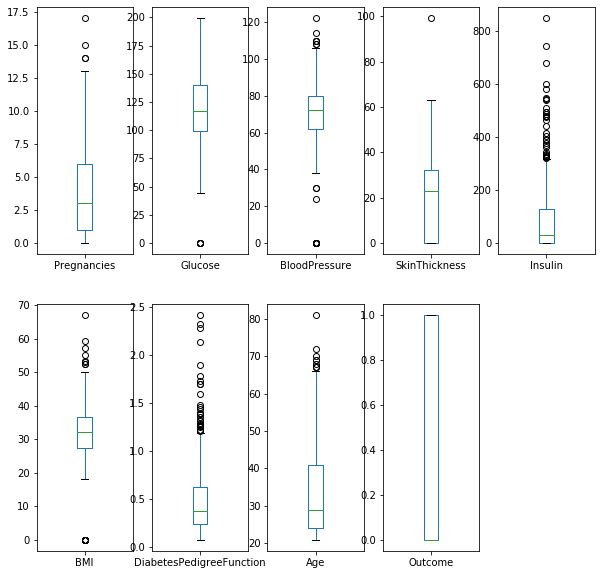

In [10]:
pid.plot(kind='box',subplots=True,layout=(2,5),figsize=(10,10))

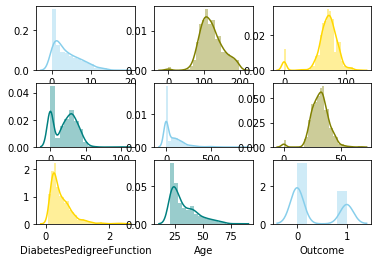

In [11]:
f, axes = plt.subplots(3, 3)
sns.distplot( pid['Pregnancies'] , color='skyblue', ax=axes[0, 0])
sns.distplot( pid['Glucose'] , color='olive', ax=axes[0, 1])
sns.distplot( pid['BloodPressure'] , color='gold', ax=axes[0, 2])
sns.distplot( pid['SkinThickness'] , color='teal', ax=axes[1, 0])
sns.distplot( pid['Insulin'] , color='skyblue', ax=axes[1, 1])
sns.distplot( pid['BMI'] , color='olive', ax=axes[1, 2])
sns.distplot( pid['DiabetesPedigreeFunction'] , color='gold', ax=axes[2, 0])
sns.distplot( pid['Age'] , color='teal', ax=axes[2, 1])
sns.distplot( pid['Outcome'] , color='skyblue', ax=axes[2, 2])

In [12]:
#sns.pairplot(pid, hue='Outcome', height=3)

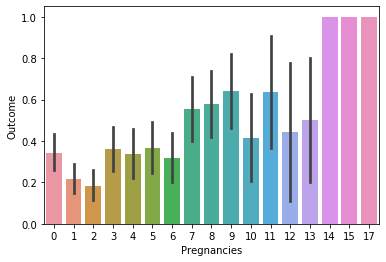

In [13]:
sns.barplot(x='Pregnancies', y='Outcome', data=pid)

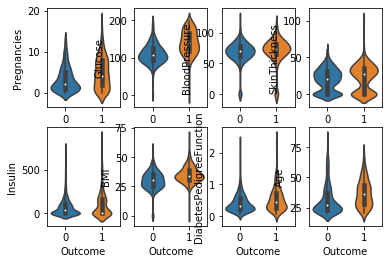

In [14]:
for column_index, column in enumerate(pid.columns):
    if column == 'Outcome':
        continue
    plt.subplot(2, 4, column_index + 1)
    sns.violinplot(x='Outcome', y=column, data=pid)

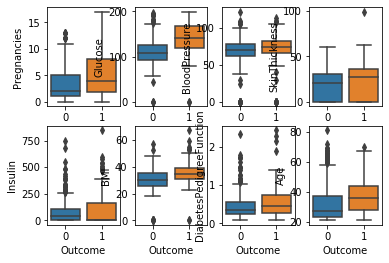

In [15]:
for column_index, column in enumerate(pid.columns):
    if column == 'Outcome':
        continue
    plt.subplot(2, 4, column_index+1)
    sns.boxplot(x='Outcome', y=column, data=pid)

In [16]:
#checking skewness
pid.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [17]:
#removing skewness
for col in pid.columns:
    if pid.skew().loc[col]>0.55:
        pid[col]=np.sqrt(pid[col])
pid.skew()

Pregnancies                -0.158938
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     0.629955
BMI                        -0.428982
DiabetesPedigreeFunction    0.901802
Age                         0.850598
Outcome                     0.635017
dtype: float64

In [18]:
#removing outlires
from scipy.stats import zscore
z=abs(zscore(pid))
print(pid.shape)
pid1=pid.loc[(z<3).all(axis=1)]
print(pid1.shape)

(768, 9)
(710, 9)


In [19]:
# dividing dataset into input values 'x' and output value 'y'
x=pid.iloc[:,:-1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.449490,148,72,35,0.000000,33.6,0.791833,7.071068
1,1.000000,85,66,29,0.000000,26.6,0.592453,5.567764
2,2.828427,183,64,0,0.000000,23.3,0.819756,5.656854
3,1.000000,89,66,23,9.695360,28.1,0.408656,4.582576
4,0.000000,137,40,35,12.961481,43.1,1.512614,5.744563


In [20]:
# standardizes the data in x using standerd scaler technique
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [21]:
y=pid['Outcome']
y.sample(5)

259    1.0
289    0.0
578    0.0
3      0.0
648    1.0
Name: Outcome, dtype: float64

In [22]:
# function to find the maximum accuracy score against random state
def M_acc(model):
    max_acc_score=0
    for acc in range(10,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=acc)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
    
        accuracy=accuracy_score(test_y,pred)
        if accuracy>max_acc_score:
            max_acc_score=accuracy
            final_acc_state=acc
    
    return final_acc_state,max_acc_score

In [23]:
# function to print the various informaion related to a particular model
def mod(state,model_name):
    for m in model:      
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=state)
        m.fit(train_x,train_y)
        pred=m.predict(test_x)
        score=cross_val_score(m,train_x,train_y,cv=14,scoring='accuracy').mean()

        print(model_name,'model score is:',m.score(train_x,train_y),'\n')
        print('Accuracy score of',model_name,'model is : ',accuracy_score(test_y,pred),'\n')
        print('The mean of cross_val_score for the',model_name,'model is:',score,'\n')
        print('Confusion matrix for the',model_name,'model is : \n',confusion_matrix(test_y,pred),'\n')
        print('Classification report for the',model_name,'model is : \n',classification_report(test_y,pred),'\n')

In [24]:
# LogisticRegression model
lr=LogisticRegression()
print('Max accuracy score crossponding to random state is:',M_acc(lr))

final_acc_state,max_acc_score = M_acc(lr)
lr_acc=max_acc_score

Max accuracy score crossponding to random state is: (56, 0.8311688311688312)


In [25]:
# GaussianNB model
gnb=GaussianNB()
print('Max accuracy score crossponding to random state is:',M_acc(gnb))

final_acc_state,max_acc_score = M_acc(gnb)
gnb_acc=max_acc_score

Max accuracy score crossponding to random state is: (57, 0.8246753246753247)


In [26]:
# SVC model
svc=SVC()
print('Max accuracy score crossponding to random state is:',M_acc(svc))

final_acc_state,max_acc_score = M_acc(svc)
svc_acc=max_acc_score

Max accuracy score crossponding to random state is: (34, 0.8376623376623377)


In [27]:
# DecisionTreeClassifier model
dtc=DecisionTreeClassifier()
print('Max accuracy score crossponding to random state is:',M_acc(dtc))

final_acc_state,max_acc_score = M_acc(dtc)
dtc_acc=max_acc_score

Max accuracy score crossponding to random state is: (12, 0.7857142857142857)


In [28]:
# RandomForestClassifier model
rfc=RandomForestClassifier()
print('Max accuracy score crossponding to random state is:',M_acc(rfc))

final_acc_state,max_acc_score = M_acc(rfc)
rfc_acc=max_acc_score

Max accuracy score crossponding to random state is: (82, 0.7987012987012987)


In [29]:
# KNeighborsClassifier model
knc=KNeighborsClassifier()
print('Max accuracy score crossponding to random state is:',M_acc(knc))

final_acc_state,max_acc_score = M_acc(knc)
knc_acc=max_acc_score

Max accuracy score crossponding to random state is: (56, 0.8051948051948052)


In [30]:
# GradientBoostingClassifier model
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate = 0.01, max_depth = 5)
print('Max accuracy score crossponding to random state is:',M_acc(gbc))

final_acc_state,max_acc_score = M_acc(gbc)
gbc_acc=max_acc_score

Max accuracy score crossponding to random state is: (91, 0.8116883116883117)


In [31]:
# comparing the performances of all the model
model_performance = pd.DataFrame({
    'Model': ['RandomForestClassifier','SVC','GaussianNB','DecisionTreeClassifier','LogisticRegression','KNeighborsClassifier','GradientBoostingClassifier'],
    'Accuracy': [rfc_acc,svc_acc,gnb_acc,dtc_acc,lr_acc,knc_acc,gbc_acc]
})

model_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,SVC,0.837662
0,RandomForestClassifier,0.831169
4,LogisticRegression,0.831169
2,GaussianNB,0.824675
5,KNeighborsClassifier,0.805195
6,GradientBoostingClassifier,0.798701
3,DecisionTreeClassifier,0.792208


In [32]:
model=[SVC()]
mod(state=34,model_name='SVC')

SVC model score is: 0.8029315960912052 

Accuracy score of SVC model is :  0.8376623376623377 

The mean of cross_val_score for the SVC model is: 0.7428470754052148 

Confusion matrix for the SVC model is : 
 [[96  9]
 [16 33]] 

Classification report for the SVC model is : 
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       105
         1.0       0.79      0.67      0.73        49

    accuracy                           0.84       154
   macro avg       0.82      0.79      0.81       154
weighted avg       0.83      0.84      0.83       154
 



In [33]:
import joblib
# saving the model using pickle.
joblib.dump(svc,'svc_6. Pima Indians Diabetes.pkl')

['svc_6. Pima Indians Diabetes.pkl']